In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from textwrap import wrap

%matplotlib inline
%run cleaning_demo.ipynb
# %run cleaning_web_data.ipynb
# %run cleaning_experiment_clients.ipynb

df_demo = import_df_demo() # type: ignore
# df_web_data = import_df_web_data() # type: ignore
# df_experiment_clients = import_df_experiment_clients() # type: ignore


In [2]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,61,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [3]:
# Numerical Columns
df_numerical = df_demo[["clnt_tenure_yr", "clnt_tenure_mnth", "clnt_age", "num_accts", "bal", "calls_6_mnth", "logons_6_mnth"]]
df_numerical

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
0,6,73,60,2,45105.30,6,9
1,7,94,58,2,110860.30,6,9
2,5,64,32,2,52467.79,6,9
3,16,198,49,2,67454.65,3,6
4,12,145,33,2,103671.75,0,3
...,...,...,...,...,...,...,...
70604,4,56,38,3,1411062.68,5,5
70605,12,148,31,2,101867.07,6,6
70606,16,198,61,2,40745.00,3,3
70607,21,255,68,3,475114.69,4,4


In [4]:
df_numerical.describe()

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,12.053007,150.659999,46.180426,2.255532,1.474467e+05,3.382469,5.566720
std,6.871850,82.090264,15.600390,0.535000,3.015106e+05,2.236595,2.353296
min,2.000000,33.000000,13.000000,1.000000,1.378942e+04,0.000000,1.000000
25%,6.000000,82.000000,32.000000,2.000000,3.734660e+04,1.000000,4.000000
50%,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


## Gender Analysis

In [5]:
def multiple_value_counts(df, list):
    for serie in list:
        # Frequency table for 'MSZoning'
        frequency_table = df[serie].value_counts()

        # Calculating the proportion of each unique value in the 'MSZoning'
        proportion_table = df[serie].value_counts(normalize=True)

        return frequency_table, proportion_table

multiple_value_counts(df_demo, ["gendr"])

(gendr
 U    24122
 M    23724
 F    22745
 X        3
 Name: count, dtype: int64,
 gendr
 U    0.341700
 M    0.336063
 F    0.322195
 X    0.000042
 Name: proportion, dtype: float64)

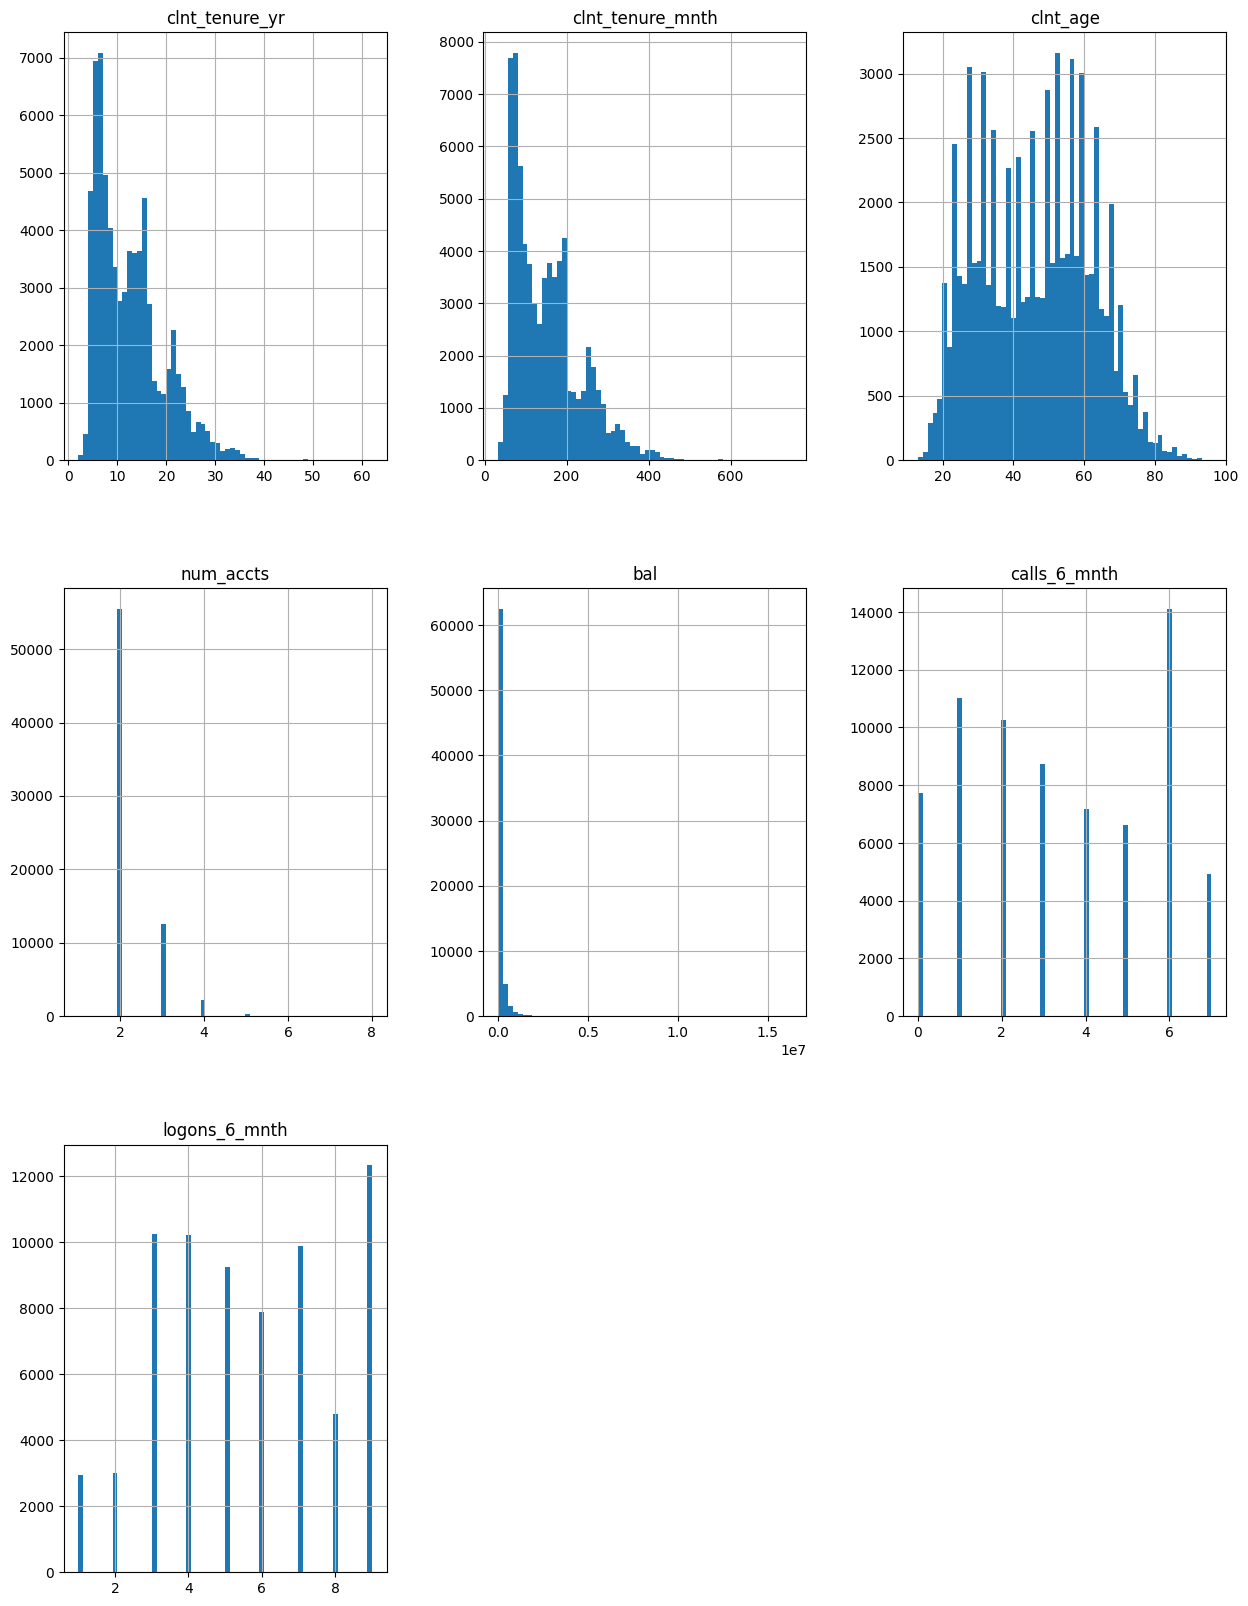

In [6]:
# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show()

## Balance Analysis

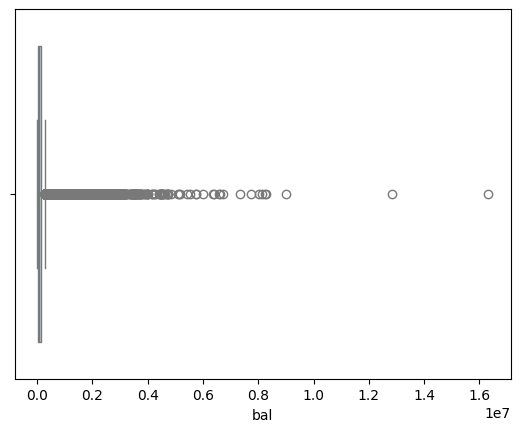

In [7]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(x = df_demo["bal"], color="lightblue")
plt.show()

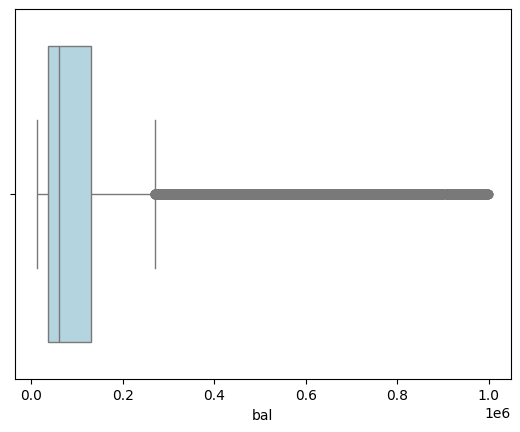

In [8]:
df_demo_test_boxplot = df_demo[df_demo["bal"] < 1000000]

sns.boxplot(x = df_demo_test_boxplot["bal"], color="lightblue")
plt.show()

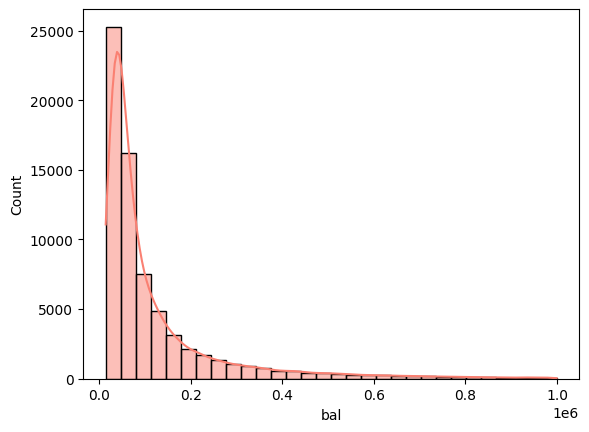

In [9]:
sns.histplot(df_demo[df_demo["bal"] < 1000000]["bal"], kde=True, bins=30, color="salmon")
plt.show()

In [10]:
df_demo[df_demo["bal"] < 1000000]["bal"].describe()

count     69416.000000
mean     118902.120536
std      146599.437804
min       13789.420000
25%       37023.505000
50%       62064.665000
75%      130659.597500
max      999154.490000
Name: bal, dtype: float64

In [11]:
# Discretizing 'bal' into 4 categories
bins = [0, 250000, 500000, 750000, df_demo['bal'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df_demo['bal_category'] = pd.cut(df_demo['bal'], bins=bins, labels=labels, include_lowest=True)

df_demo['bal_category'].value_counts()

bal_category
Low          61156
Medium        5626
Very High     1936
High          1876
Name: count, dtype: int64

## Exporting Dataframes

In [12]:
def import_df_explore_demo():
    return (
       #
        )